Class Weights: {0: 0.5008661206149896, 1: 289.14340101522845}
Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.5597 - loss: 212.0087 - val_accuracy: 0.9943 - val_loss: 0.0448
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5555 - loss: 131.0496 - val_accuracy: 0.0037 - val_loss: 143.0824
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6349 - loss: 60.8725 - val_accuracy: 0.0492 - val_loss: 2.5508
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5740 - loss: 27.7418 - val_accuracy: 0.9982 - val_loss: 0.0607
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6592 - loss: 19.4882 - val_accuracy: 0.0063 - val_loss: 41.3840
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6147 - loss: 15.6134 - val_accuracy: 0.9993 - val_loss: 0.5155
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9444 - loss: 1.0106 - val_accuracy: 0.9986 - val_loss: 0.5503
Epoch 8/10

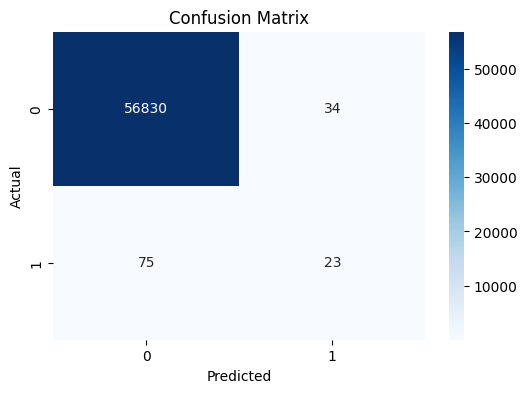

Model saved successfully!


In [4]:
# ✅ Step 1: Install & Import Dependencies
!pip install -q tensorflow numpy pandas scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Step 2: Load Dataset
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

# ✅ Step 3: Data Preprocessing
# Separate features and target
X = df.drop(columns=['Class']).values  # Convert to NumPy array
y = df['Class'].values  # Convert to NumPy array

# Normalize the Amount column
scaler = StandardScaler()
X[:, -1] = scaler.fit_transform(X[:, -1].reshape(-1, 1)).flatten()

# ✅ Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Step 5: Compute Class Weights for Imbalance Handling
class_weights = dict(enumerate(
    compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
))
print("Class Weights:", class_weights)

# ✅ Step 6: Build Neural Network Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# ✅ Step 7: Train the Model with Class Weights
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weights  # Apply class weights
)

# ✅ Step 8: Model Evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary values

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Step 9: Save & Load Model (Optional)
model.save("credit_card_fraud_model.h5")
print("Model saved successfully!")

# To reload the model later:
# loaded_model = tf.keras.models.load_model("credit_card_fraud_model.h5")
